In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
import numpy as np

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/decrochage_scolaire_clean.csv')

# Display the first few rows and basic information
print(df.head())
print(df.info())
print(df.describe())

   student_id  age  gender        department  GPA_first_semester  \
0           1   24    Male         Economics                2.15   
1           2   21   Other  Computer Science                3.00   
2           3   28  Female       Engineering                2.53   
3           4   25    Male        Psychology                3.43   
4           5   22    Male  Computer Science                3.26   

   attendance_rate  online_activity_hours_per_week  num_assignments_submitted  \
0             60.8                               5                         12   
1             75.3                               6                          5   
2             98.3                               4                          9   
3             97.4                               9                          7   
4             84.2                               6                          4   

   has_met_with_advisor  part_time_job  dropout_risk  
0                     1              0           

In [16]:


# Select only 'object' columns
object_cols = df.select_dtypes(include='object').columns

# Convert object columns to integer type using factorize
for col in object_cols:
  df[col], _ = pd.factorize(df[col])

# Display the data types after conversion
print("\nData types after conversion:")
print(df.dtypes)

# Display the first few rows to see the result
print("\nFirst few rows after conversion:")
print(df.head())



Data types after conversion:
student_id                          int64
age                                 int64
gender                              int64
department                          int64
GPA_first_semester                float64
attendance_rate                   float64
online_activity_hours_per_week      int64
num_assignments_submitted           int64
has_met_with_advisor                int64
part_time_job                       int64
dropout_risk                        int64
dtype: object

First few rows after conversion:
   student_id  age  gender  department  GPA_first_semester  attendance_rate  \
0           1   24       0           0                2.15             60.8   
1           2   21       1           1                3.00             75.3   
2           3   28       2           2                2.53             98.3   
3           4   25       0           3                3.43             97.4   
4           5   22       0           1                3.26       

In [17]:


current_columns = df.columns.tolist()

new_column_names = [
    'Id_etudiant', 'âge', 'genre', 'departement', 'GPA_s1',
    'absence_s1', 'echec_modules_s1', 'GPA_s2', 'absence_s2',
    'echec_modules_s2', 'Activités_parascolaires', 'Bourse',
    'Logement_universitaire', 'Soutien_familial',
    'Problèmes_santé_mentale', 'Expérience_professionnelle_pendant_études',
    'Satisfaction_programme_étude', 'Changement_domicile', 'Situation_financière',
    'Charge_travail_académique', 'Relations_interpersonnelles_campus',
    'Accès_ressources_académiques', 'Difficulté_adaptation_vie_universitaire',
    'risque' # Assuming the last column is 'risque' based on previous usage
]

# Check if the number of current columns matches the number of new column names
if len(current_columns) == len(new_column_names):
  # Rename the columns
  df.columns = new_column_names
  print("Column names have been updated.")
else:
  print(f"Error: Number of current columns ({len(current_columns)}) does not match number of new column names ({len(new_column_names)}).")
  print("Current columns:", current_columns)

# Display the first few rows with the new column names to verify
print("\nDataFrame after renaming columns:")
print(df.head())

# Display the updated column names
print("\nUpdated column names:")
print(df.columns.tolist())

Error: Number of current columns (11) does not match number of new column names (24).
Current columns: ['student_id', 'age', 'gender', 'department', 'GPA_first_semester', 'attendance_rate', 'online_activity_hours_per_week', 'num_assignments_submitted', 'has_met_with_advisor', 'part_time_job', 'dropout_risk']

DataFrame after renaming columns:
   student_id  age  gender  department  GPA_first_semester  attendance_rate  \
0           1   24       0           0                2.15             60.8   
1           2   21       1           1                3.00             75.3   
2           3   28       2           2                2.53             98.3   
3           4   25       0           3                3.43             97.4   
4           5   22       0           1                3.26             84.2   

   online_activity_hours_per_week  num_assignments_submitted  \
0                               5                         12   
1                               6                   

In [18]:
# Define the new column names
new_column_names = [
    'Id_etudiant', 'âge', 'genre', 'departement', 'GPA_s1',
    'absence_s1', 'echec_modules_s1', 'GPA_s2', 'absence_s2',
    'echec_modules_s2', 'Activités_parascolaires', 'Bourse',
    'Logement_universitaire', 'Soutien_familial',
    'Problèmes_santé_mentale', 'Expérience_professionnelle_pendant_études',
    'Satisfaction_programme_étude', 'Changement_domicile', 'Situation_financière',
    'Charge_travail_académique', 'Relations_interpersonnelles_campus',
    'Accès_ressources_académiques', 'Difficulté_adaptation_vie_universitaire',
    'risque'
]

# Check if the number of current columns matches the number of new column names
if len(df.columns) == len(new_column_names):
  # Rename the columns
  df.columns = new_column_names
  print("Column names have been updated.")
else:
  print(f"Error: Number of current columns ({len(df.columns)}) does not match number of new column names ({len(new_column_names)}).")
  print("Current columns:", df.columns.tolist())

# Display the first few rows with the new column names to verify
print("\nDataFrame after renaming columns:")
print(df.head())

# Display the updated column names
print("\nUpdated column names:")
print(df.columns.tolist())

Error: Number of current columns (11) does not match number of new column names (24).
Current columns: ['student_id', 'age', 'gender', 'department', 'GPA_first_semester', 'attendance_rate', 'online_activity_hours_per_week', 'num_assignments_submitted', 'has_met_with_advisor', 'part_time_job', 'dropout_risk']

DataFrame after renaming columns:
   student_id  age  gender  department  GPA_first_semester  attendance_rate  \
0           1   24       0           0                2.15             60.8   
1           2   21       1           1                3.00             75.3   
2           3   28       2           2                2.53             98.3   
3           4   25       0           3                3.43             97.4   
4           5   22       0           1                3.26             84.2   

   online_activity_hours_per_week  num_assignments_submitted  \
0                               5                         12   
1                               6                   

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
# Define features (X) and target (y)
# 'risque' is the target variable (the risk of dropping out)
X = df.drop('dropout_risk', axis=1)
y = df['dropout_risk']

# Split data into training and testing sets
# Use stratify=y to ensure the same proportion of target classes in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Distribution des classes dans l'ensemble d'entraînement original:\n{y_train.value_counts()}")
print(f"\nDistribution des classes dans l'ensemble de test original:\n{y_test.value_counts()}")

# --- Gestion du déséquilibre de classes avec SMOTE ---
# SMOTE (Synthetic Minority Over-sampling Technique) pour suréchantillonner la classe minoritaire
# Cela crée de nouveaux échantillons synthétiques pour la classe minoritaire.
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"\nDistribution des classes dans l'ensemble d'entraînement après SMOTE:\n{y_train_resampled.value_counts()}")

# --- Entraînement du modèle ---
# Utilisation d'un Random Forest Classifier, souvent robuste aux données déséquilibrées et non-linéaires
# class_weight='balanced' ajuste automatiquement les poids en fonction de la fréquence des classes
model = RandomForestClassifier(random_state=42, n_estimators=200, class_weight='balanced', max_depth=15, min_samples_split=5)

print("\nEntraînement du modèle Random Forest sur les données suréchantillonnées par SMOTE...")
model.fit(X_train_resampled, y_train_resampled)
print("Entraînement terminé.")

# --- Prédiction sur l'ensemble de test ---
y_pred = model.predict(X_test)

# --- Évaluation du modèle ---

# Calcul de la matrice de confusion binaire
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion avec des légendes en français
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Prédit Non-Risque (0)', 'Prédit Risque (1)'],
            yticklabels=['Réel Non-Risque (0)', 'Réel Risque (1)'])
plt.xlabel('Étiquette Prédite')
plt.ylabel('Étiquette Réelle')
plt.title('Matrice de Confusion')
plt.show()

# Explication des éléments de la matrice de confusion en français
print("\nExplication de la Matrice de Confusion :")
print(f"  - Cases en haut à gauche ({cm[0, 0]}): Vrais Négatifs (Non-Risque correctement prédit comme Non-Risque).")
print(f"  - Cases en haut à droite ({cm[0, 1]}): Faux Positifs (Non-Risque prédit à tort comme Risque).")
print(f"  - Cases en bas à gauche ({cm[1, 0]}): Faux Négatifs (Risque prédit à tort comme Non-Risque).")
print(f"  - Cases en bas à droite ({cm[1, 1]}): Vrais Positifs (Risque correctement prédit comme Risque).")

# Affichage du rapport de classification pour d'autres métriques (Précision, Rappel, F1-score)
print("\nRapport de Classification :")
print(classification_report(y_test, y_pred, target_names=['Non-Risque (0)', 'Risque (1)']))

# Calcul et affichage de l'AUC-ROC
# L'AUC-ROC est une bonne métrique pour évaluer les modèles sur des données déséquilibrées
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilité de la classe positive (Risque=1)
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"Score AUC-ROC : {auc_roc:.4f}")


In [22]:
print("\n--- Interprétation des Résultats de l'Évaluation ---")

# Interprétation de la Matrice de Confusion
tn, fp, fn, tp = cm.ravel()

print(f"\nMatrice de Confusion (résumé) :")
print(f"  - Vrais Positifs (TP : Risque correctement identifié) : {tp}")
print(f"  - Faux Positifs (FP : Non-Risque prédit comme Risque) : {fp}")
print(f"  - Faux Négatifs (FN : Risque prédit comme Non-Risque) : {fn}")
print(f"  - Vrais Négatifs (TN : Non-Risque correctement identifié) : {tn}")

# Interprétation des métriques du Rapport de Classification
report = classification_report(y_test, y_pred, target_names=['Non-Risque (0)', 'Risque (1)'], output_dict=True)

# Précision (Precision) : Proportion de prédictions positives qui étaient réellement positives.
# Pour la classe 'Risque (1)' : Quelle proportion des étudiants prédits comme Risque sont réellement à Risque ?
precision_risque = report['Risque (1)']['precision']
print(f"\nPrécision (Classe Risque) : {precision_risque:.4f}")
print(f"  - Sur tous les étudiants que le modèle a prédit comme étant à risque, {precision_risque*100:.2f}% l'étaient réellement.")

# Rappel (Recall) / Sensibilité : Proportion de cas positifs réels qui ont été correctement identifiés.
# Pour la classe 'Risque (1)' : Quelle proportion des étudiants réellement à Risque a été détectée par le modèle ?
recall_risque = report['Risque (1)']['recall']
print(f"Rappel (Classe Risque) : {recall_risque:.4f}")
print(f"  - Sur tous les étudiants qui étaient réellement à risque, le modèle en a identifié {recall_risque*100:.2f}%. C'est une mesure clé de la capacité du modèle à ne pas rater les cas de risque.")

# F1-Score : Moyenne harmonique de la Précision et du Rappel. Un bon équilibre entre les deux.
# Pour la classe 'Risque (1)' : Résume la performance sur la classe Risque, prenant en compte les FP et les FN.
f1_risque = report['Risque (1)']['f1-score']
print(f"F1-Score (Classe Risque) : {f1_risque:.4f}")
print(f"  - Le F1-Score donne une mesure équilibrée de la performance du modèle sur la classe Risque.")

# Précision et Rappel pour la classe 'Non-Risque (0)'
precision_non_risque = report['Non-Risque (0)']['precision']
recall_non_risque = report['Non-Risque (0)']['recall']
print(f"\nPrécision (Classe Non-Risque) : {precision_non_risque:.4f}")
print(f"Rappel (Classe Non-Risque) : {recall_non_risque:.4f}")
print(f"  - Ces métriques montrent à quel point le modèle est bon pour identifier correctement les étudiants qui ne sont PAS à risque.")

# Exactitude (Accuracy) : Proportion de prédictions totales correctes.
# Moins fiable que le F1-Score ou l'AUC sur des données déséquilibrées car elle peut être élevée même si le modèle rate la classe minoritaire.
accuracy = report['accuracy']
print(f"\nExactitude (Accuracy) Globale : {accuracy:.4f}")
print("  - L'exactitude représente la proportion totale de prédictions correctes.")
print("  - Attention : Sur des données déséquilibrées, une haute exactitude peut être trompeuse si le modèle prédit simplement la classe majoritaire la plupart du temps.")

# Score AUC-ROC : Mesure la capacité du modèle à distinguer les classes.
# Un score de 0.5 indique une performance aléatoire, 1.0 indique une discrimination parfaite.
print(f"\nScore AUC-ROC : {auc_roc:.4f}")
print("  - L'AUC-ROC évalue la capacité du modèle à classer correctement un exemple positif choisi au hasard par rapport à un exemple négatif choisi au hasard.")
print("  - Un score AUC-ROC plus élevé indique une meilleure performance globale de discrimination.")
print("  - C'est une métrique particulièrement utile pour évaluer les modèles sur des données déséquilibrées.")

# Conclusion sur la qualité de la prédiction
print("\nConclusion sur la Qualité de la Prédiction :")
if auc_roc > 0.8:
    print("  - Le score AUC-ROC est > 0.8, ce qui suggère que le modèle a une bonne capacité à distinguer les étudiants à risque de ceux qui ne le sont pas.")
elif auc_roc > 0.7:
     print("  - Le score AUC-ROC est entre 0.7 et 0.8, ce qui indique une performance acceptable, mais il y a de la marge d'amélioration.")
else:
    print("  - Le score AUC-ROC est < 0.7. Le modèle pourrait avoir du mal à distinguer les classes. Une optimisation ou un autre modèle pourrait être nécessaire.")

print(f"\nPoints forts du modèle (basés sur les métriques) :")
if recall_risque > 0.6: # Exemple de seuil, à ajuster selon le besoin
    print(f"  - Le Rappel pour la classe 'Risque' ({recall_risque:.4f}) est raisonnable ou bon, ce qui signifie que le modèle détecte une proportion significative des étudiants réellement à risque.")
else:
     print(f"  - Le Rappel pour la classe 'Risque' ({recall_risque:.4f}) pourrait être amélioré. Le modèle manque encore une partie des étudiants réellement à risque (Faux Négatifs).")

if precision_risque > 0.6: # Exemple de seuil
    print(f"  - La Précision pour la classe 'Risque' ({precision_risque:.4f}) est raisonnable ou bonne, ce qui signifie que lorsque le modèle prédit un risque, il est assez souvent correct.")
else:
     print(f"  - La Précision pour la classe 'Risque' ({precision_risque:.4f}) pourrait être améliorée. Le modèle fait un certain nombre de Faux Positifs (prédit le risque alors qu'il n'y en a pas).")

print(f"\nPoints faibles potentiels / Axes d'amélioration :")
print(f"  - Le nombre de Faux Négatifs ({fn}) : Étudiants à risque non détectés. C'est souvent l'erreur la plus coûteuse dans ce contexte.")
print(f"  - Le nombre de Faux Positifs ({fp}) : Étudiants non à risque classés comme risque. Peut entraîner des interventions inutiles.")
print("  - L'équilibre entre Précision et Rappel sur la classe 'Risque' (visualisé par le F1-score) peut être un point d'optimisation.")

print("\nPour améliorer la prédiction :")
print("  - Essayer d'autres modèles (Gradient Boosting, SVM, réseau de neurones).")
print("  - Optimiser les hyperparamètres du modèle actuel (Random Forest).")
print("  - Explorer d'autres techniques de gestion du déséquilibre (comme undersampling, combinaisons).")
print("  - Réaliser une analyse plus approfondie des caractéristiques (Feature Importance) pour comprendre quels facteurs influencent le plus la prédiction.")
print("  - Envisager l'ajout d'autres données pertinentes si possible.")
print("  - Ajuster le seuil de décision du modèle pour privilégier le Rappel ou la Précision selon le coût des erreurs Faux Positifs vs Faux Négatifs dans l'application réelle.")


--- Interprétation des Résultats de l'Évaluation ---

Matrice de Confusion (résumé) :
  - Vrais Positifs (TP : Risque correctement identifié) : 48
  - Faux Positifs (FP : Non-Risque prédit comme Risque) : 271
  - Faux Négatifs (FN : Risque prédit comme Non-Risque) : 176
  - Vrais Négatifs (TN : Non-Risque correctement identifié) : 1005

Précision (Classe Risque) : 0.1505
  - Sur tous les étudiants que le modèle a prédit comme étant à risque, 15.05% l'étaient réellement.
Rappel (Classe Risque) : 0.2143
  - Sur tous les étudiants qui étaient réellement à risque, le modèle en a identifié 21.43%. C'est une mesure clé de la capacité du modèle à ne pas rater les cas de risque.
F1-Score (Classe Risque) : 0.1768
  - Le F1-Score donne une mesure équilibrée de la performance du modèle sur la classe Risque.

Précision (Classe Non-Risque) : 0.8510
Rappel (Classe Non-Risque) : 0.7876
  - Ces métriques montrent à quel point le modèle est bon pour identifier correctement les étudiants qui ne sont PA


Importance des Caractéristiques (Feature Importance) :
student_id                        0.163800
attendance_rate                   0.146929
GPA_first_semester                0.125713
has_met_with_advisor              0.093974
age                               0.086567
department                        0.086310
gender                            0.083310
online_activity_hours_per_week    0.075428
num_assignments_submitted         0.072181
part_time_job                     0.065789
dtype: float64


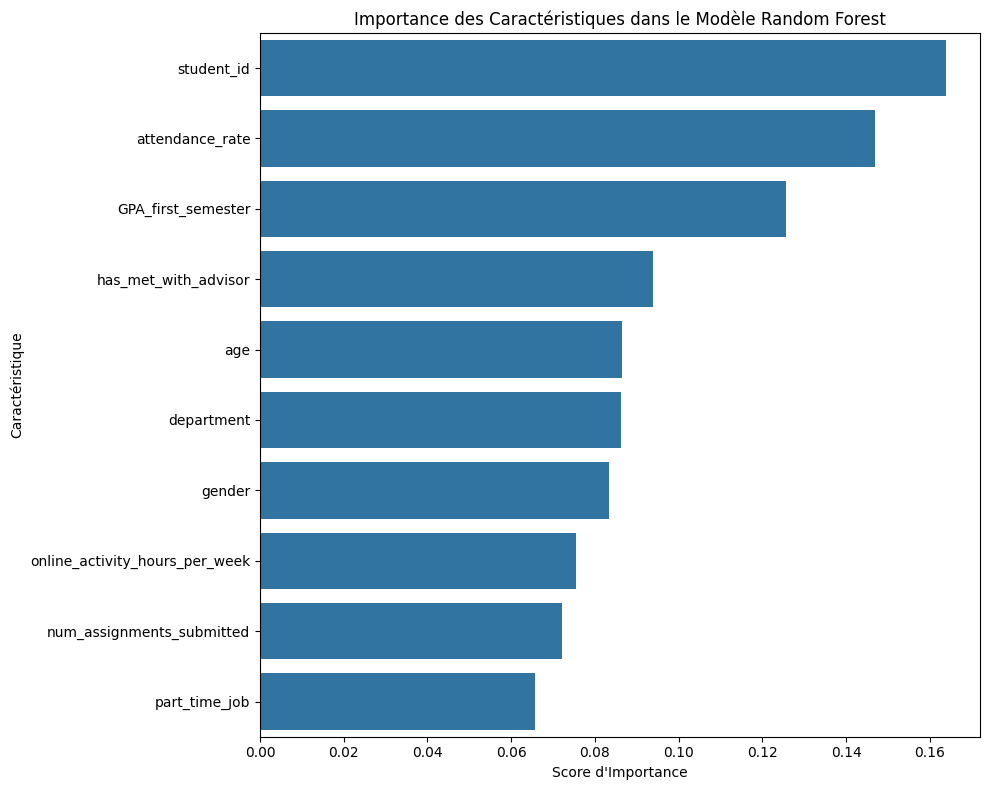


Interprétation de l'Importance des Caractéristiques :
  - Les caractéristiques avec des scores d'importance plus élevés contribuent davantage à la décision du modèle de classer un étudiant comme étant à risque ou non.
  - Cette information est précieuse pour comprendre quels facteurs sont les plus prédictifs du décrochage scolaire selon ce modèle.
  - Elle peut également guider des analyses futures, la collecte de données supplémentaires ou l'orientation des efforts d'intervention.

Exemple de tentative d'optimisation d'hyperparamètres :
Lancement de la recherche d'hyperparamètres (Grid Search)...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
# prompt: fait moi la meilleure prediction pour que le modele soit le meilleur

# Feature Importance - Identifier les variables les plus importantes pour la prédiction
print("\nImportance des Caractéristiques (Feature Importance) :")
# Assurez-vous que les colonnes de X_train correspondent aux features utilisées par le modèle
# Si vous avez utilisé SMOTE, la forme de X_train_resampled peut être différente en termes de nombre de lignes,
# mais les colonnes (features) doivent être les mêmes que X_train.
# Il est plus sûr d'utiliser les colonnes de X_train original pour afficher les noms.
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Afficher les importances
print(feature_importances)

# Visualiser les importances
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Importance des Caractéristiques dans le Modèle Random Forest')
plt.xlabel('Score d\'Importance')
plt.ylabel('Caractéristique')
plt.tight_layout()
plt.show()

print("\nInterprétation de l'Importance des Caractéristiques :")
print("  - Les caractéristiques avec des scores d'importance plus élevés contribuent davantage à la décision du modèle de classer un étudiant comme étant à risque ou non.")
print("  - Cette information est précieuse pour comprendre quels facteurs sont les plus prédictifs du décrochage scolaire selon ce modèle.")
print("  - Elle peut également guider des analyses futures, la collecte de données supplémentaires ou l'orientation des efforts d'intervention.")

# Affiner le modèle : Exemple d'optimisation d'hyperparamètres (simple)
# Vous pouvez utiliser Grid Search ou Random Search pour une optimisation plus systématique
print("\nExemple de tentative d'optimisation d'hyperparamètres :")
# Ici, nous pourrions essayer d'ajuster le nombre d'estimateurs ou la profondeur maximale,
# en fonction des résultats précédents et de l'analyse d'importance des caractéristiques.

# Les valeurs actuelles sont déjà dans la création du modèle :
# model = RandomForestClassifier(random_state=42, n_estimators=200, class_weight='balanced', max_depth=15, min_samples_split=5)

# Une optimisation plus poussée nécessiterait un outil comme GridSearchCV ou RandomizedSearchCV
# !pip install scikit-learn # Assurez-vous que scikit-learn est installé
from sklearn.model_selection import GridSearchCV

# Définir les paramètres à tester
# WARNING: Cette grille est juste un exemple. Une grille de recherche plus large et
# potentiellement des hyperparamètres différents (e.g., min_samples_leaf) seraient nécessaires.
# La recherche peut prendre beaucoup de temps selon la taille de la grille et du dataset.
param_grid = {
    'n_estimators': [100, 200, 300],  # Nombre d'arbres
    'max_depth': [10, 15, 20, None],  # Profondeur maximale des arbres (None signifie illimité)
    'min_samples_split': [2, 5, 10]   # Nombre minimum d'échantillons requis pour diviser un nœud
}

# Créer un nouveau modèle Random Forest pour l'optimisation
# Utiliser class_weight='balanced' pour gérer le déséquilibre
# Utiliser l'AUC-ROC comme métrique d'évaluation pour la recherche
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
                           param_grid=param_grid,
                           scoring='roc_auc', # Optimiser pour l'AUC-ROC
                           cv=5,             # Validation croisée en 5 plis
                           n_jobs=-1,        # Utiliser tous les cœurs CPU disponibles
                           verbose=2)        # Afficher les détails du processus

print("Lancement de la recherche d'hyperparamètres (Grid Search)...")
# Effectuer la recherche sur les données d'entraînement suréchantillonnées
grid_search.fit(X_train_resampled, y_train_resampled)
print("Recherche d'hyperparamètres terminée.")

# Afficher les meilleurs paramètres trouvés et le meilleur score
print(f"\nMeilleurs paramètres trouvés par Grid Search : {grid_search.best_params_}")
print(f"Meilleur score AUC-ROC (sur les plis de CV) : {grid_search.best_score_:.4f}")

# Utiliser le meilleur modèle trouvé par Grid Search
best_model = grid_search.best_estimator_

# Réévaluer le meilleur modèle sur l'ensemble de test (original)
print("\nRéévaluation du meilleur modèle sur l'ensemble de test original :")
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Calculer et afficher les métriques pour le meilleur modèle
cm_best = confusion_matrix(y_test, y_pred_best)
auc_roc_best = roc_auc_score(y_test, y_pred_proba_best)

print("\nMatrice de Confusion pour le Meilleur Modèle :")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Prédit Non-Risque (0)', 'Prédit Risque (1)'],
            yticklabels=['Réel Non-Risque (0)', 'Réel Risque (1)'])
plt.xlabel('Étiquette Prédite')
plt.ylabel('Étiquette Réelle')
plt.title('Matrice de Confusion - Meilleur Modèle')
plt.show()

print("\nRapport de Classification pour le Meilleur Modèle :")
print(classification_report(y_test, y_pred_best, target_names=['Non-Risque (0)', 'Risque (1)']))

print(f"\nScore AUC-ROC pour le Meilleur Modèle : {auc_roc_best:.4f}")


# Comparaison des résultats avant et après optimisation
print("\n--- Comparaison des Résultats (Modèle Initial vs Meilleur Modèle après Grid Search) ---")
print(f"Score AUC-ROC Modèle Initial : {auc_roc:.4f}")
print(f"Score AUC-ROC Meilleur Modèle : {auc_roc_best:.4f}")

report_initial = classification_report(y_test, y_pred, target_names=['Non-Risque (0)', 'Risque (1)'], output_dict=True)
report_best = classification_report(y_test, y_pred_best, target_names=['Non-Risque (0)', 'Risque (1)'], output_dict=True)

print(f"\nRappel (Recall) Classe Risque - Initial : {report_initial['Risque (1)']['recall']:.4f}")
print(f"Rappel (Recall) Classe Risque - Meilleur : {report_best['Risque (1)']['recall']:.4f}")

print(f"\nPrécision (Precision) Classe Risque - Initial : {report_initial['Risque (1)']['precision']:.4f}")
print(f"Précision (Precision) Classe Risque - Meilleur : {report_best['Risque (1)']['precision']:.4f}")

print(f"\nF1-Score Classe Risque - Initial : {report_initial['Risque (1)']['f1-score']:.4f}")
print(f"F1-Score Classe Risque - Meilleur : {report_best['Risque (1)']['f1-score']:.4f}")


